        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Model Performance Report:
Mean Absolute Error (MAE): 42.79
Mean Squared Error (MSE): 2900.19
Root Mean Squared Error (RMSE): 53.85
R-squared (R²): 0.45


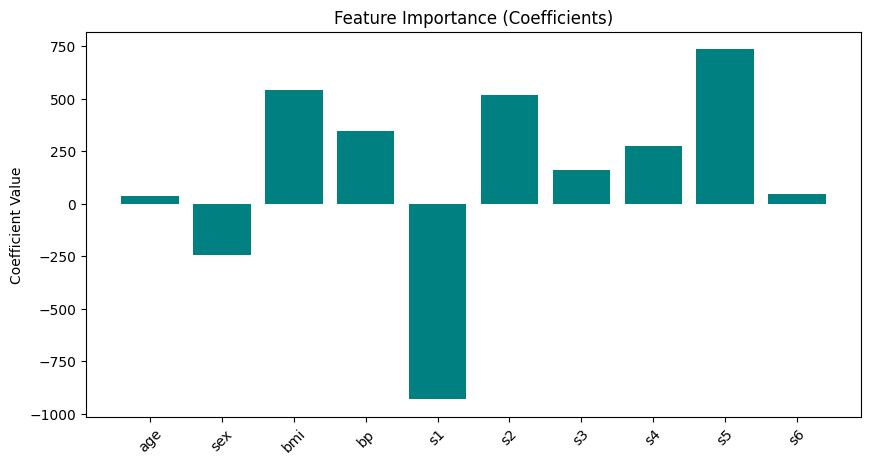

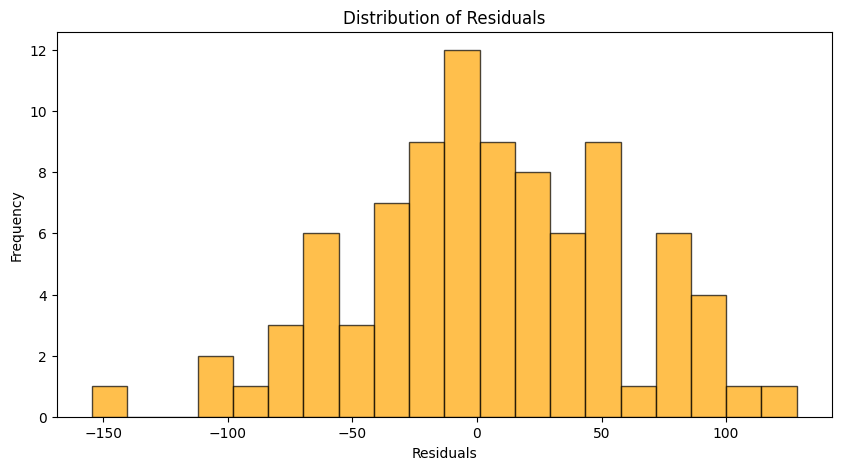

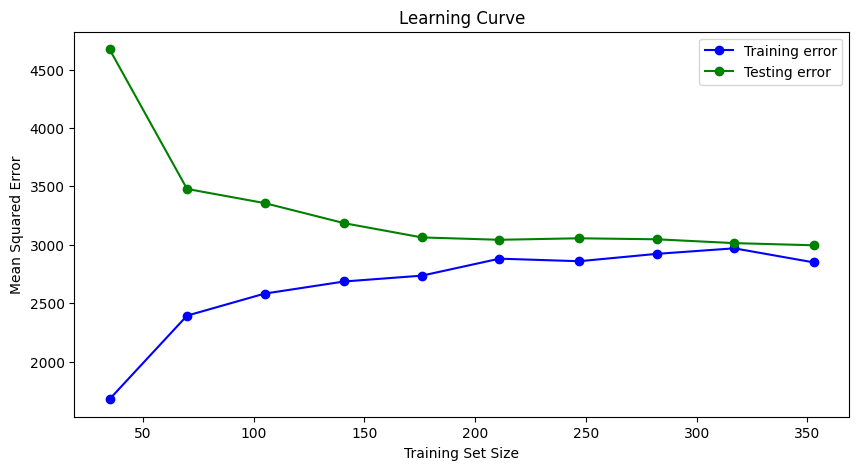

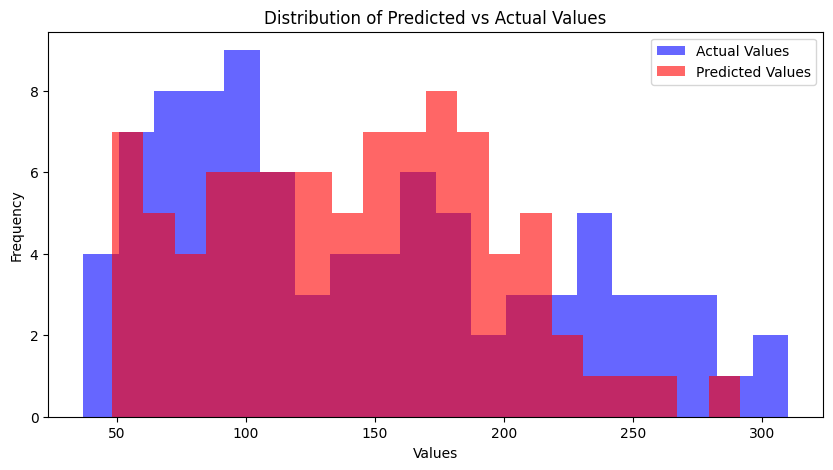

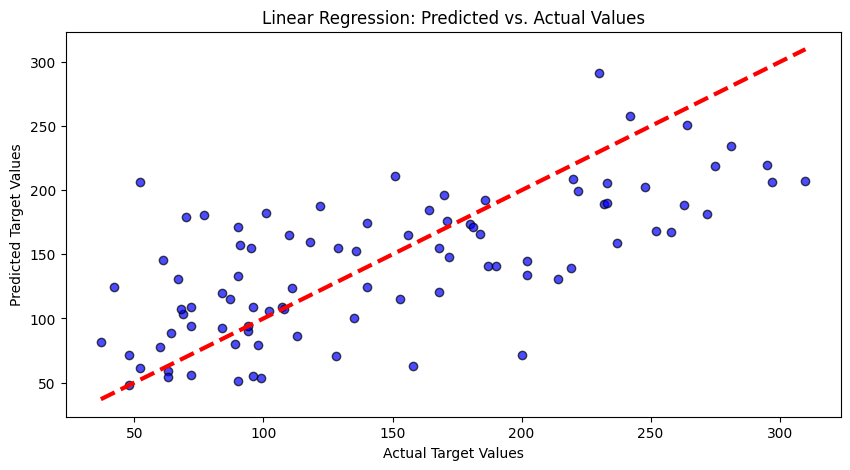

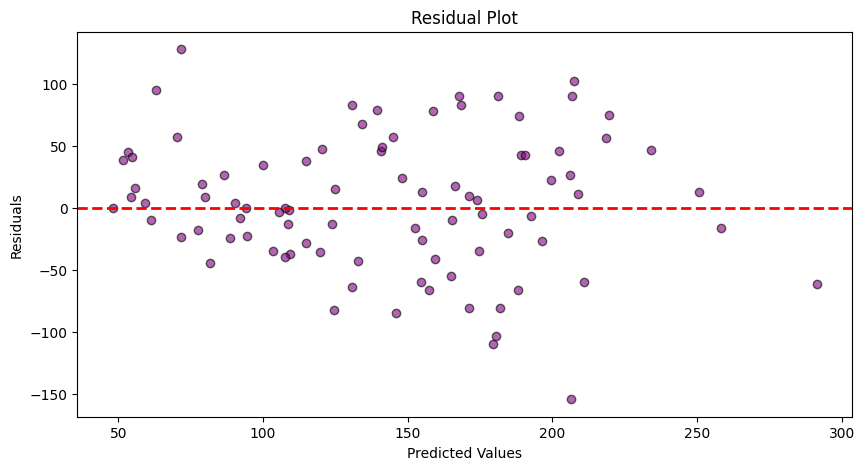

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
import math


# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print(df.head())
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)


# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Display model performance metrics
print("Model Performance Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")




# 1. Feature Importance (Coefficient Plot)
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_names)), model.coef_, color="teal")
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Feature Importance (Coefficients)")
plt.show()


# 2. Distribution of Errors (Residual Histogram)
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20, color="orange", edgecolor="black", alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)


plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Testing error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()


# 4. Prediction Error Distribution
plt.figure(figsize=(10, 5))
plt.hist(y_test, bins=20, color="blue", alpha=0.6, label="Actual Values")
plt.hist(y_pred, bins=20, color="red", alpha=0.6, label="Predicted Values")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend(loc="best")
plt.title("Distribution of Predicted vs Actual Values")
plt.show()


# 5. Predicted vs. Actual Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color="blue", edgecolor="k", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=3)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Linear Regression: Predicted vs. Actual Values")
plt.show()


# 6. Residual Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, color="purple", edgecolor="k", alpha=0.6)
plt.axhline(0, color="red", linestyle="--", lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# s1: Total serum cholesterol (TC)
# s2: Low-density lipoproteins (LDL)
# s3: High-density lipoproteins (HDL)
# s4: Total cholesterol to HDL ratio (TC/HDL)
# s5: Logarithm of serum triglycerides level (LTG)
# s6: Blood sugar level (GLU)
